In [111]:
from pathlib import Path

import math
import numpy as np
import pandas as pd
import spacy

from cooking_seasonally.helpers.utils import data_path

# EDA for NER model

In [112]:
BASE_DIR = Path().resolve().parent.parent

## Explore the train set

In [113]:
train_df = pd.read_csv(data_path(BASE_DIR, 'interim', 'train_set.csv'), sep=';')
train_df.head()

,ingredients,main_ingredient
0,"1 large red onion, halved lengthways, thinly s...",NaN
1,2 small green jalapenos,NaN
2,2/3 cup rice vinegar,NaN
3,1 tablespoon lime juice,NaN
4,1 heaped teaspoon sea salt,NaN


### What are the main ingredients in the train set? 

In [114]:
print(f'There are {len(set(train_df.main_ingredient))} food items in the train set')

There are 126 food items in the train set


<Axes: xlabel='main_ingredient'>

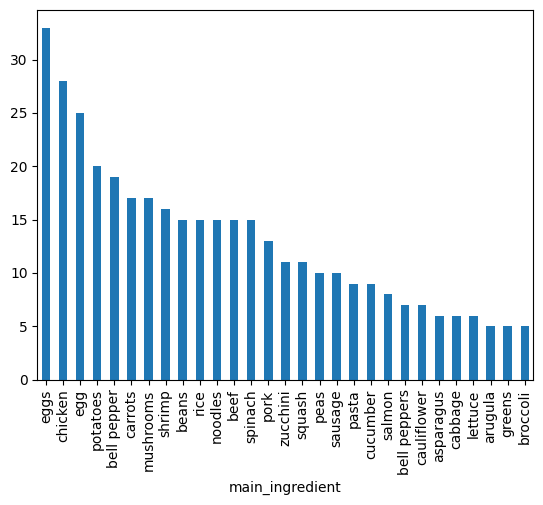

In [115]:
train_df.main_ingredient.value_counts()[1:30].plot.bar()

## Explore the evaluation set

In [116]:

eval_set_df = pd.read_csv(data_path(BASE_DIR, 'interim', 'dev_set.csv'), sep=';')
eval_set_df['main_ingredient'] = eval_set_df['main_ingredient'].replace(math.nan, "")
eval_set_df.head()

,ingredients,main_ingredient
0,"large sweet potato (250g), cut into 2½cm-thic...",sweet potato
1,olive oil,
2,salt and black pepper,
3,"garlic cloves, peeled and thinly sliced",
4,tomato passata,tomato


### What are the main ingredients in the evaluation set? 

In [117]:
print(f'There are {len(set(eval_set_df.main_ingredient))} food items in the test set')

There are 27 food items in the test set


<Axes: xlabel='main_ingredient'>

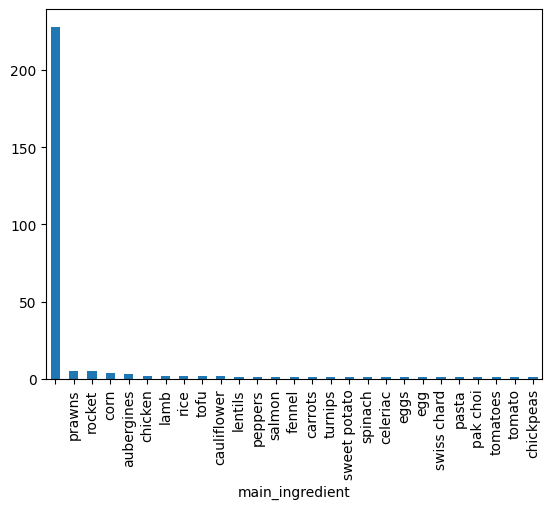

In [118]:
eval_set_df.main_ingredient.value_counts().plot.bar()

### Let's see the main ingeredients predicted

In [119]:
# The NER model with highest F-score
model_path = Path(BASE_DIR) / "models/NER/model-best"
model = spacy.load(model_path)


In [120]:
eval_set_df['main_ingredient_pred'] = eval_set_df.ingredients.map(lambda x: model(x).ents[0].text if model(x).ents!=() else "")

In [121]:
eval_set_df.head(10)

,ingredients,main_ingredient,main_ingredient_pred
0,"large sweet potato (250g), cut into 2½cm-thic...",sweet potato,sweet potato
1,olive oil,,
2,salt and black pepper,,
3,"garlic cloves, peeled and thinly sliced",,
4,tomato passata,tomato,tomato
5,caster sugar,,
6,datterini tomatoes (or regular cherry tomatoes),tomatoes,tomatoes
7,"roughly chopped coriander leaves, plus 1 tbsp...",,
8,"greek feta, roughly crumbled into large chunks",,
9,pre-cooked jasmine rice or 180g jasmine rice ...,rice,cooked


In [122]:
(eval_set_df.main_ingredient == eval_set_df.main_ingredient_pred).sum()

np.int64(270)

In [123]:
eval_set_df.main_ingredient.value_counts()

main_ingredient
                228
prawns            5
rocket            5
corn              4
aubergines        3
chicken           2
lamb              2
rice              2
tofu              2
cauliflower       2
lentils           1
peppers           1
salmon            1
fennel            1
carrots           1
turnips           1
sweet potato      1
spinach           1
celeriac          1
eggs              1
egg               1
swiss chard       1
pasta             1
pak choi          1
tomatoes          1
tomato            1
chickpeas         1
Name: count, dtype: int64

In [124]:
print(eval_set_df[(eval_set_df.main_ingredient != eval_set_df.main_ingredient_pred)][['main_ingredient', 'main_ingredient_pred']])

    main_ingredient main_ingredient_pred
9              rice               cooked
253       chickpeas     cooked chickpeas
